# EDA 데이터 갖고 놀자

- **`seaborn`**

# csv 파일 읽기

In [1]:
import pandas as pd

df_train = pd.read_csv('./input/train.csv')
df_test = pd.read_csv('./input/test.csv')


In [2]:
# df_train 데이터 엿보기 (default : 5)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# 1. 1차원 plot

In [5]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})

### ex1) Sex

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#default = 'white'
sns.set_style('darkgrid') # darkgrid, whitegrid, dark, white

f,ax=plt.subplots(1, 3, figsize=(12,4))

#[0][0]
sns.countplot(x="Sex", data=df_train,ax=ax[0])

ax[0].set_title("countplot")

#[0][1]
sns.kdeplot(df_train["Sex"].values, ax=ax[1])

ax[1].set_xlabel("Sex")
ax[1].set_title("kdeplot")

sns.distplot(df_train["Sex"].values, ax=ax[2])

ax[2].set_xlabel("Sex")
ax[2].set_title("distplot")


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'distplot')

## ex2) Fare

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'distplot')

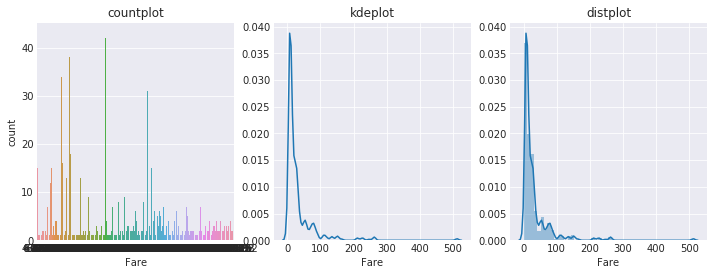

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#default = 'white'
sns.set_style('darkgrid') # darkgrid, whitegrid, dark, white

f,ax=plt.subplots(1, 3, figsize=(12,4))

# countplot
sns.countplot(x="Fare", data=df_train,ax=ax[0]) # 1차원이므로 x축만 설정하면됨. 2차원일때는 y축 컬럼까지 표기해주면 됨
# == sns.countplot(df_train["Fare"].values,ax=ax[0])

ax[0].set_title("countplot")

# kdeplot
sns.kdeplot(df_train["Fare"].values, ax=ax[1])

ax[1].set_xlabel("Fare")
ax[1].set_title("kdeplot")

# distplot
sns.distplot(df_train["Fare"].values, ax=ax[2])

ax[2].set_xlabel("Fare")
ax[2].set_title("distplot")

# 2. 2차원 plot (실수)


scatter plot을 이용

seaborn에서는 `jointplot` 을 이용


```python
sns.jointplot(x="x_name", y="y_name", data=dataframe, kind='scatter')
```


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


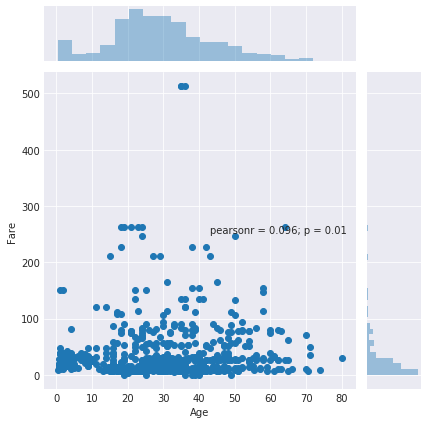

In [24]:
sns.jointplot(x="Age", y="Fare", data=df_train, kind='scatter')

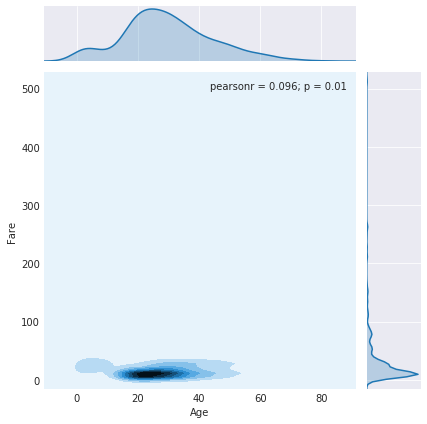

In [25]:
sns.jointplot(x="Age", y="Fare", data=df_train, kind='kde')

# Null Check

In [ ]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

# Null 데이터 처리

In [ ]:
df_train = df_train.dropna()
df_test = df_test.fillna(0)

In [ ]:
df_train.info()

In [ ]:
df_test.info()

`dropna()` 를 이용하여 

**`Age`** 가 `NaN` 인 행을 삭제하였더니

`df_train` 은 714행을 가지는 df가 되었다.

# Data Cleaning

## 1) Sex

In [ ]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})





## 2) Fare

In [ ]:
def category_fare(x):
    if x <= 7.91:
        return 0
    elif x <= 14.454:
        return 1
    elif x <= 31.0:
        return 2
    else:
        return 3

df_train['Fare'] = df_train['Fare'].apply(category_fare)    
df_test['Fare'] = df_test['Fare'].apply(category_fare)

## 3) Age

In [ ]:
df_train['CategoricalAge'] = pd.cut(df_train['Age'], 5)
print (df_train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())

In [ ]:
import seaborn as sns

#sns.regplot("Age", "Survived", data=df_train, robust=True, ci=None, color="seagreen")


palpal  ==  dictdict((manman=="#4682B4""#4682B , woman="#CD5C5C", child="#2E8B57", male="#6495ED", female="#F08080")
                      
palpal  ==  dictdict((manman=="#4682B4""#4682B , woman="#CD5C5C", child="#2E8B57", male="#6495ED", female="#F08080")
sns.factorplot("Sex", data=df_train, palette=pal)

In [ ]:
def category_age(x):
    if x <= 10:
        return 0
    elif x <= 20:
        return 1
    elif x <= 30:
        return 2
    elif x <= 40:
        return 3
    elif x <= 50:
        return 4
    elif x<= 60:
        return 5
    elif x <= 70:
        return 6
    else:
        return 7
        

In [ ]:
df_train['Age'] = df_train['Age'].apply(category_age)
df_test['Age'] = df_test['Age'].apply(category_age)

# 원래 float 형이었는데, int 형으로 자동으로 바껴지네..

In [ ]:
df_train.head()

# 모델 만들기

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 
from sklearn.model_selection import train_test_split


In [ ]:
#학습시킬 생존 여부 값
target_label = df_train['Survived'].values

# 학습시킬 환경 값
X_train = df_train.drop('Survived', axis=1).values

# 테스트 할 환경 값
X_test = df_test.values

In [ ]:
print( X_train )

In [ ]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018) # 입력값, 결과값, test_size, random_state ??

In [ ]:
# 모의고사

model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

In [ ]:
from pandas import Series
import matplotlib.pyplot as plt

plt.style.use('seaborn')

plt.figure(figsize=(8, 8))

Series(model.feature_importances_, index=df_test.columns).sort_values(ascending=True).plot.barh()

plt.xlabel('Feature importance')
plt.ylabel('Feature')

plt.show()

In [ ]:
submission = pd.read_csv('./input/gender_submission.csv')

submission.head()

In [ ]:
X_test

In [ ]:
submission['Survived'] = model.predict(X_test)

submission.head(10)

In [ ]:
model.predict(X_test)

In [ ]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

In [ ]:
df_test.info()

In [ ]:
submission['Survived'].mean()

# 제출용 csv 파일 만들기

In [ ]:
submission.to_csv('./output/v3-1.csv', index=False)